In [2]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

# Loading of data file

In [3]:
feat_file=pd.read_csv('cancer_preprocess.csv')

In [4]:
feat_file.head()

,A1_0,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,...,E5_118,E5_119,E5_120,E5_121,E5_122,E5_123,E5_124,E5_125,E5_126,E5_127
0,0.183793,0.239916,0.850030,0.210690,0.896150,0.866617,0.860076,0.115359,0.374133,0.927302,...,0.793461,0.576311,0.189772,0.784201,0.335585,0.644900,0.301631,0.547792,0.479534,0.308149
1,0.908285,0.882967,0.804499,0.167710,0.854424,0.773797,0.818178,0.146237,0.822128,0.880442,...,0.792318,0.645596,0.668128,0.267654,0.732278,0.791278,0.680896,0.315371,0.368137,0.192646
2,0.187789,0.896291,0.089300,0.872091,0.140625,0.809294,0.833710,0.439762,0.836772,0.120445,...,0.594850,0.744443,0.246511,0.767050,0.736697,0.710731,0.586913,0.777560,0.706049,0.311375
3,0.911319,0.907869,0.831656,0.767504,0.886981,0.589135,0.704022,0.613958,0.852084,0.481431,...,0.593676,0.227899,0.264702,0.535805,0.480239,0.731689,0.799642,0.856727,0.824530,0.582091
4,0.181163,0.800212,0.827693,0.149731,0.739144,0.843704,0.841885,0.127548,0.112236,0.898438,...,0.391759,0.808125,0.147298,0.859803,0.620034,0.734427,0.126441,0.508898,0.552177,0.360427


In [5]:
feat_file.shape

(2129, 3200)

In [6]:
X=feat_file.values

In [7]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [8]:
y=label.values.ravel()

# split


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [10]:
X_train.shape

(1703, 3200)

In [12]:
y_train.shape

(1703,)

# boruta

In [13]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)


In [14]:
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X_train, y_train)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_train_filtered = feat_selector.transform(X_train)
X_test_filtered = feat_selector.transform(X_test)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	776
Rejected: 	2424
Iteration: 	9 / 100
Confirmed: 	158
Tentative: 	618
Rejected: 	2424
Iteration: 	10 / 100
Confirmed: 	158
Tentative: 	618
Rejected: 	2424
Iteration: 	11 / 100
Confirmed: 	158
Tentative: 	618
Rejected: 	2424
Iteration: 	12 / 100
Confirmed: 	176
Tentative: 	413
Rejected: 	2611
Iteration: 	13 / 100
Confirmed: 	176
Tentative: 	413
Rejected: 	2611
Iteration: 	14 / 100
Confirmed: 	176
Tentative: 	413
Rejected: 	2611
Iteration: 	15 / 100
Confirmed: 	176
Tentative: 	413
Rejected: 	2611
Iter

In [15]:
X_train_filtered.shape

(1703, 237)

In [16]:
y_train.shape

(1703,)

In [17]:
selected_feat_indices = np.where(feat_selector.support_ == True)[0]

In [18]:
selected_feat_indices

array([ 136,  151,  243,  253,  268,  421,  427,  430,  459,  468,  485,
        492,  510,  549,  588,  608,  641,  642,  656,  657,  680,  684,
        689,  698,  720,  724,  733,  747,  795,  849,  889,  911,  974,
       1047, 1059, 1064, 1072, 1089, 1095, 1107, 1112, 1114, 1116, 1121,
       1123, 1124, 1129, 1130, 1138, 1140, 1150, 1186, 1189, 1197, 1228,
       1240, 1246, 1255, 1256, 1284, 1288, 1289, 1290, 1292, 1295, 1296,
       1298, 1299, 1301, 1305, 1306, 1307, 1314, 1318, 1320, 1323, 1325,
       1327, 1330, 1332, 1335, 1337, 1344, 1345, 1346, 1361, 1363, 1364,
       1365, 1368, 1370, 1375, 1377, 1382, 1385, 1386, 1388, 1399, 1402,
       1403, 1508, 1547, 1664, 1683, 1719, 1727, 1728, 1772, 1789, 1836,
       1837, 1879, 1890, 1986, 2014, 2051, 2054, 2055, 2056, 2067, 2077,
       2081, 2082, 2083, 2086, 2094, 2099, 2101, 2104, 2116, 2118, 2138,
       2139, 2153, 2165, 2168, 2169, 2181, 2230, 2243, 2244, 2254, 2265,
       2278, 2281, 2301, 2332, 2351, 2370, 2402, 24

In [19]:
selected_feat_names = list(feat_file.columns[selected_feat_indices])

In [20]:
selected_feat_names

['A2_8',
 'A2_23',
 'A2_115',
 'A2_125',
 'A3_12',
 'A4_37',
 'A4_43',
 'A4_46',
 'A4_75',
 'A4_84',
 'A4_101',
 'A4_108',
 'A4_126',
 'A5_37',
 'A5_76',
 'A5_96',
 'B1_1',
 'B1_2',
 'B1_16',
 'B1_17',
 'B1_40',
 'B1_44',
 'B1_49',
 'B1_58',
 'B1_80',
 'B1_84',
 'B1_93',
 'B1_107',
 'B2_27',
 'B2_81',
 'B2_121',
 'B3_15',
 'B3_78',
 'B4_23',
 'B4_35',
 'B4_40',
 'B4_48',
 'B4_65',
 'B4_71',
 'B4_83',
 'B4_88',
 'B4_90',
 'B4_92',
 'B4_97',
 'B4_99',
 'B4_100',
 'B4_105',
 'B4_106',
 'B4_114',
 'B4_116',
 'B4_126',
 'B5_34',
 'B5_37',
 'B5_45',
 'B5_76',
 'B5_88',
 'B5_94',
 'B5_103',
 'B5_104',
 'C1_4',
 'C1_8',
 'C1_9',
 'C1_10',
 'C1_12',
 'C1_15',
 'C1_16',
 'C1_18',
 'C1_19',
 'C1_21',
 'C1_25',
 'C1_26',
 'C1_27',
 'C1_34',
 'C1_38',
 'C1_40',
 'C1_43',
 'C1_45',
 'C1_47',
 'C1_50',
 'C1_52',
 'C1_55',
 'C1_57',
 'C1_64',
 'C1_65',
 'C1_66',
 'C1_81',
 'C1_83',
 'C1_84',
 'C1_85',
 'C1_88',
 'C1_90',
 'C1_95',
 'C1_97',
 'C1_102',
 'C1_105',
 'C1_106',
 'C1_108',
 'C1_119',
 'C1_1

In [21]:
train_x = pd.DataFrame(X_train)
test_x = pd.DataFrame(X_test)

In [22]:
train_x.columns=feat_file.columns
test_x.columns=feat_file.columns

In [23]:
new_df=train_x.loc[:,selected_feat_names]
X_train_filtered=new_df

new_df_test=test_x.loc[:,selected_feat_names]
X_test_filtered=new_df_test

In [24]:
X_train_filtered.to_csv('X_train_filtered_boruta_signaturizer_names.csv',index=False)
X_test_filtered.to_csv('X_test_filtered_boruta_signaturizer_names.csv',index=False)

In [25]:
X_train_filtered

,A2_8,A2_23,A2_115,A2_125,A3_12,A4_37,A4_43,A4_46,A4_75,A4_84,...,E4_112,E4_113,E4_114,E4_115,E4_119,E4_121,E4_122,E4_123,E4_126,E5_5
0,0.884363,0.224360,0.383512,0.913506,0.239860,0.870604,0.793279,0.811282,0.140829,0.906497,...,0.236000,0.807087,0.796920,0.872050,0.210743,0.256487,0.213495,0.778185,0.273056,0.237895
1,0.872646,0.165415,0.857825,0.899961,0.502124,0.130803,0.150020,0.811840,0.812320,0.177443,...,0.699762,0.278821,0.775812,0.219749,0.142745,0.849638,0.288620,0.150245,0.803880,0.350016
2,0.173710,0.390357,0.326067,0.896078,0.141955,0.879120,0.142980,0.819511,0.233662,0.169512,...,0.883914,0.332949,0.127925,0.417856,0.399455,0.464477,0.503005,0.288366,0.249497,0.305442
3,0.876476,0.162913,0.860006,0.902437,0.146437,0.107008,0.129340,0.808697,0.834458,0.153408,...,0.470388,0.558500,0.855502,0.311428,0.441911,0.835570,0.331700,0.710965,0.432350,0.387568
4,0.785815,0.159730,0.822434,0.905985,0.146900,0.107047,0.129300,0.834821,0.833865,0.154050,...,0.560417,0.734440,0.456901,0.911293,0.466380,0.840091,0.261310,0.652035,0.231593,0.624921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,0.889054,0.693138,0.818260,0.868458,0.151614,0.857918,0.820037,0.760383,0.112877,0.935694,...,0.826780,0.301986,0.109113,0.310900,0.589927,0.166368,0.815620,0.369425,0.293055,0.244731
1699,0.873286,0.370933,0.114098,0.900794,0.151542,0.903600,0.824095,0.836731,0.108665,0.941391,...,0.288469,0.818566,0.804532,0.822259,0.166871,0.420959,0.196713,0.791603,0.253726,0.424588
1700,0.170780,0.927914,0.210259,0.763178,0.288158,0.854545,0.420991,0.836247,0.836536,0.904013,...,0.351733,0.476992,0.922240,0.322386,0.286466,0.396945,0.226584,0.703594,0.784173,0.318120
1701,0.760464,0.160889,0.833215,0.915169,0.195844,0.457689,0.138859,0.821774,0.824908,0.163771,...,0.816482,0.262625,0.192686,0.303468,0.160629,0.860350,0.244542,0.147304,0.548457,0.334048


In [26]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

In [27]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_train_filtered)
y_pred = km.labels_

/home/ahujalab4/.conda/envs/asvm/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train_filtered,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

In [29]:
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})

In [30]:
data

,Clustering_scores,Scores
0,silhouette_score,0.024035
1,adjusted_rand_score,0.107220
2,normalized_mutual_info_score,0.079590


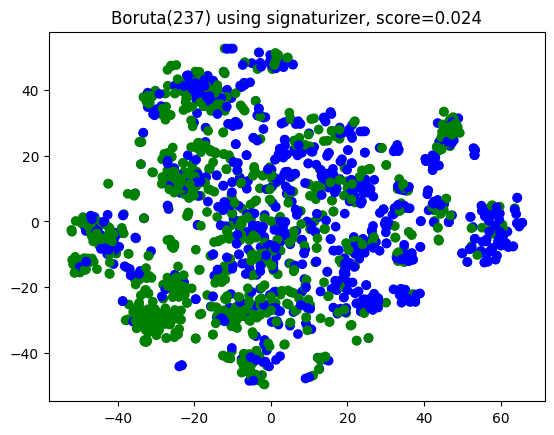

In [31]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_train_filtered)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

#plt.legend()

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('Boruta(237) using signaturizer, score=0.024')
plt.show()

## RFC

In [32]:
#define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train_filtered,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train_filtered)
y_pred_test=forest.predict(X_test_filtered)
y_prediction_values_train=forest.predict_proba(X_train_filtered)
y_prediction_values_test=forest.predict_proba(X_test_filtered)

In [33]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

rfc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
rfc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[138  61]
 [ 78 149]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6389    0.6935    0.6651       199
           1     0.7095    0.6564    0.6819       227

    accuracy                         0.6737       426
   macro avg     0.6742    0.6749    0.6735       426
weighted avg     0.6765    0.6737    0.6740       426



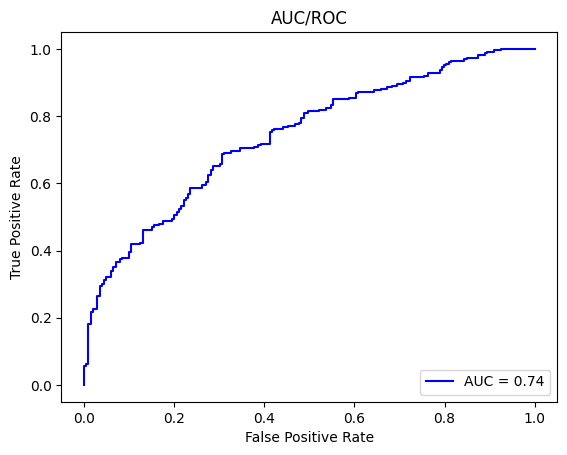

In [34]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train_filtered,y_train)
y_pred_test=KNN.predict(X_test_filtered)
y_pred_train=KNN.predict(X_train_filtered)


y_prediction_values_train=KNN.predict_proba(X_train_filtered)
y_prediction_values_test=KNN.predict_proba(X_test_filtered)


In [36]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

knn_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
knn_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[137  62]
 [ 68 159]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6683    0.6884    0.6782       199
           1     0.7195    0.7004    0.7098       227

    accuracy                         0.6948       426
   macro avg     0.6939    0.6944    0.6940       426
weighted avg     0.6956    0.6948    0.6951       426



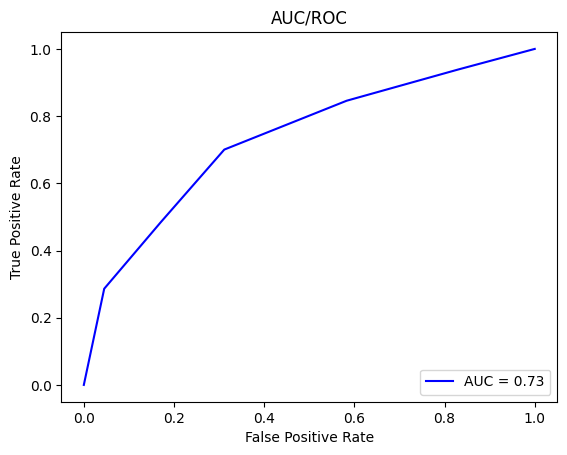

In [37]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_2=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# SVC

In [38]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train_filtered,y_train)
y_pred_test=model.predict(X_test_filtered)
y_pred_train=model.predict(X_train_filtered)

y_prediction_values_train=model.predict_proba(X_train_filtered)
y_prediction_values_test=model.predict_proba(X_test_filtered)

In [39]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


svc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
svc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[136  63]
 [ 70 157]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6602    0.6834    0.6716       199
           1     0.7136    0.6916    0.7025       227

    accuracy                         0.6878       426
   macro avg     0.6869    0.6875    0.6870       426
weighted avg     0.6887    0.6878    0.6880       426



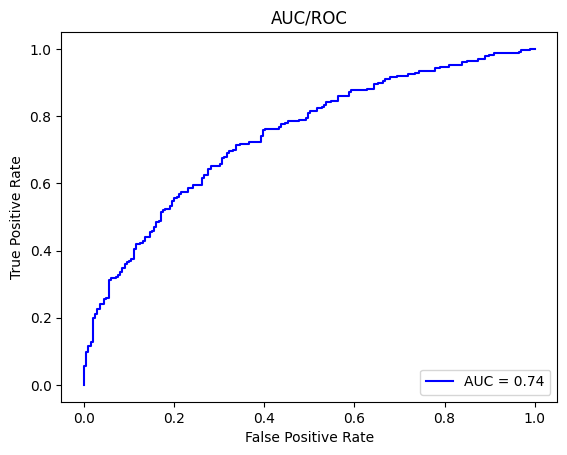

In [40]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_3=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_filtered,y_train)
y_pred_test=lr.predict(X_test_filtered)
y_pred_train=lr.predict(X_train_filtered)

y_prediction_values_train=lr.predict_proba(X_train_filtered)
y_prediction_values_test=lr.predict_proba(X_test_filtered)                                     

/home/ahujalab4/.conda/envs/asvm/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

lr_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lr_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[118  81]
 [ 76 151]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6082    0.5930    0.6005       199
           1     0.6509    0.6652    0.6580       227

    accuracy                         0.6315       426
   macro avg     0.6296    0.6291    0.6292       426
weighted avg     0.6310    0.6315    0.6311       426



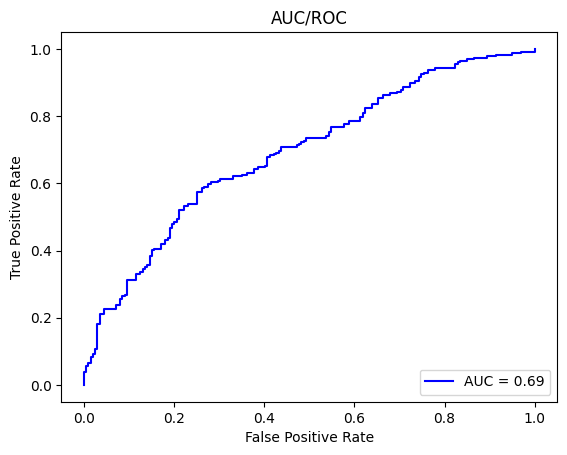

In [43]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_4=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# XGB

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train_filtered, y_train)
y_pred_train = xgb.predict(X_train_filtered)
y_pred_test = xgb.predict(X_test_filtered)

y_prediction_values_train=xgb.predict_proba(X_train_filtered)
y_prediction_values_test=xgb.predict_proba(X_test_filtered)

[20:02:26] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [45]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)

xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)



xgb_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
xgb_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[128  71]
 [ 70 157]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6465    0.6432    0.6448       199
           1     0.6886    0.6916    0.6901       227

    accuracy                         0.6690       426
   macro avg     0.6675    0.6674    0.6675       426
weighted avg     0.6689    0.6690    0.6690       426



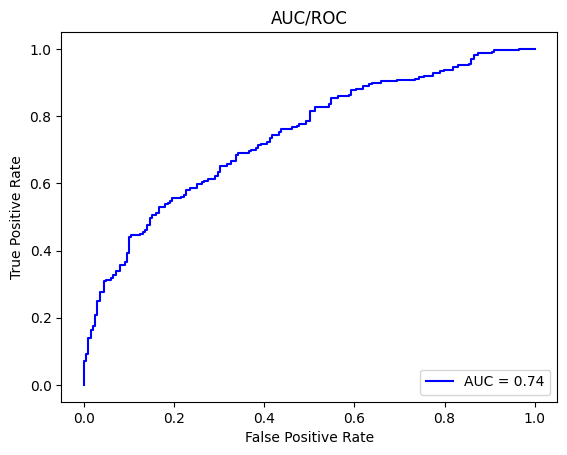

In [46]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_5=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Gaussian NB

In [47]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_filtered, y_train)

y_pred_train = clf.predict(X_train_filtered)
y_pred_test = clf.predict(X_test_filtered)
y_prediction_values_train=clf.predict_proba(X_train_filtered)
y_prediction_values_test=clf.predict_proba(X_test_filtered)

In [48]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

clf_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
clf_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[119  80]
 [ 72 155]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6230    0.5980    0.6103       199
           1     0.6596    0.6828    0.6710       227

    accuracy                         0.6432       426
   macro avg     0.6413    0.6404    0.6406       426
weighted avg     0.6425    0.6432    0.6426       426



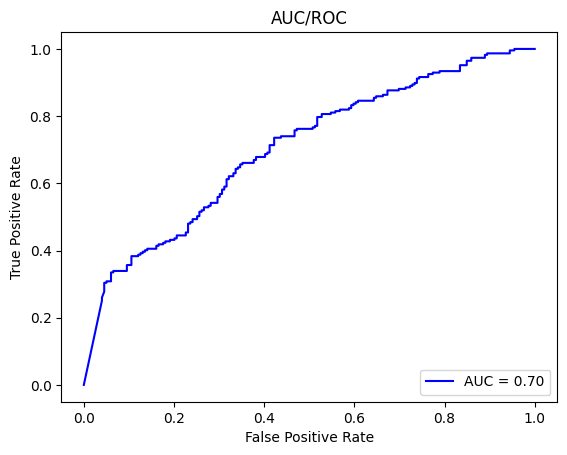

In [49]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_6=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## MLP

In [50]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_filtered, y_train)

y_pred_train = mlp.predict(X_train_filtered)
y_pred_test = mlp.predict(X_test_filtered)
y_prediction_values_train=mlp.predict_proba(X_train_filtered)
y_prediction_values_test=mlp.predict_proba(X_test_filtered)

In [51]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)

mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


mlp_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
mlp_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[118  81]
 [ 73 154]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6178    0.5930    0.6051       199
           1     0.6553    0.6784    0.6667       227

    accuracy                         0.6385       426
   macro avg     0.6366    0.6357    0.6359       426
weighted avg     0.6378    0.6385    0.6379       426



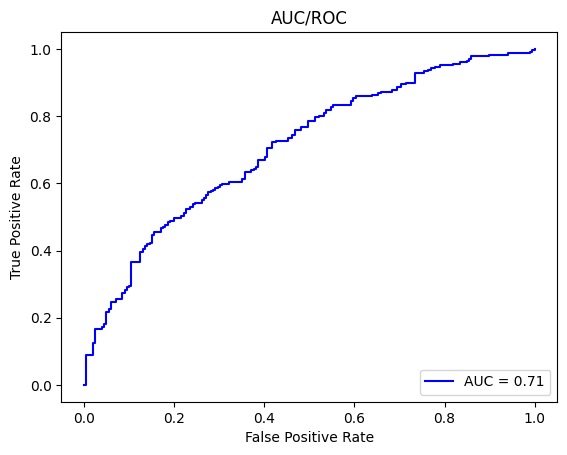

In [52]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_7=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Extratree classifier

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train_filtered, y_train)


y_pred_train = etc.predict(X_train_filtered)
y_pred_test = etc.predict(X_test_filtered)
y_prediction_values_train=etc.predict_proba(X_train_filtered)
y_prediction_values_test=etc.predict_proba(X_test_filtered)

In [54]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)

etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

etc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
etc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[133  66]
 [ 69 158]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6584    0.6683    0.6633       199
           1     0.7054    0.6960    0.7007       227

    accuracy                         0.6831       426
   macro avg     0.6819    0.6822    0.6820       426
weighted avg     0.6834    0.6831    0.6832       426



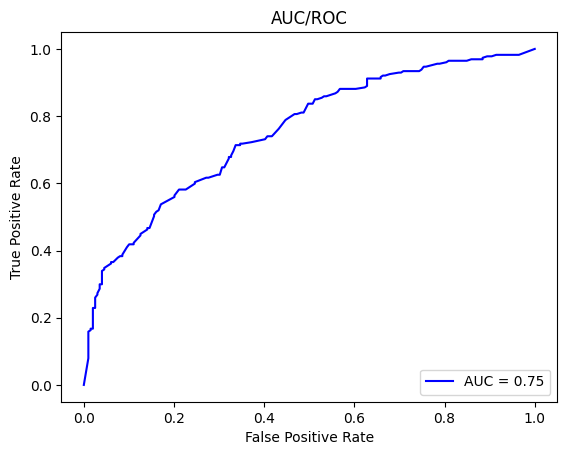

In [55]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_8=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Decision Tree classifier

In [56]:
## Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train_filtered, y_train)


y_pred_train = dtc.predict(X_train_filtered)
y_pred_test = dtc.predict(X_test_filtered)

y_prediction_values_train=dtc.predict_proba(X_train_filtered)
y_prediction_values_test=dtc.predict_proba(X_test_filtered)                           

In [57]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)

dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

dtc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
dtc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[127  72]
 [105 122]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5474    0.6382    0.5893       199
           1     0.6289    0.5374    0.5796       227

    accuracy                         0.5845       426
   macro avg     0.5881    0.5878    0.5844       426
weighted avg     0.5908    0.5845    0.5841       426



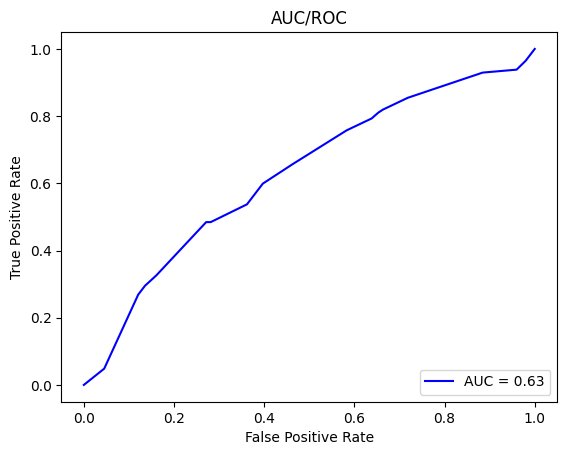

In [58]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_9=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## LDA

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train)


y_pred_train =lda.predict(X_train_filtered)
y_pred_test = lda.predict(X_test_filtered)

y_prediction_values_train=lda.predict_proba(X_train_filtered)
y_prediction_values_test=lda.predict_proba(X_test_filtered)
                                                        

In [60]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)

lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


lda_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lda_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[119  80]
 [ 72 155]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6230    0.5980    0.6103       199
           1     0.6596    0.6828    0.6710       227

    accuracy                         0.6432       426
   macro avg     0.6413    0.6404    0.6406       426
weighted avg     0.6425    0.6432    0.6426       426



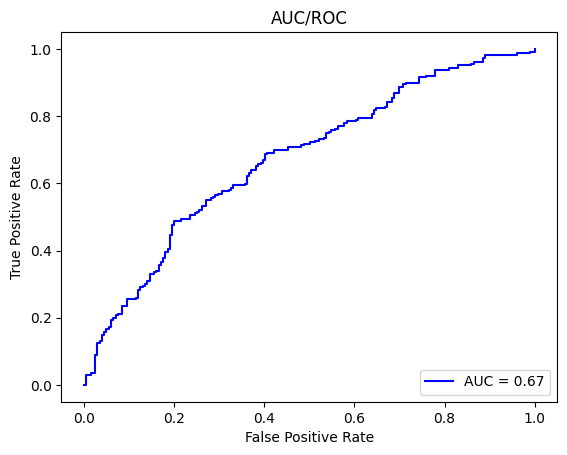

In [61]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_10=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

In [62]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC_train':[rfc_auc_train,knn_auc_train,svc_auc_train,lr_auc_train,xgb_auc_train,clf_auc_train,mlp_auc_train,etc_auc_train,dtc_auc_train,lda_auc_train]}
df_train = pd.DataFrame(data_train)

In [63]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa_test],
               'AUC/ROC_test':[rfc_auc_test,knn_auc_test,svc_auc_test,lr_auc_test,xgb_auc_test,clf_auc_test,mlp_auc_test,etc_auc_test,dtc_auc_test,lda_auc_test]}
             
df_test = pd.DataFrame(data_test)             

In [64]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC_train
0,RFC,83.499706,0.669687,0.834843,0.839408,0.840365,0.669686,0.922143
1,KNN,79.506753,0.589814,0.794905,0.802059,0.799316,0.589810,0.883284
2,SVC,87.257780,0.745100,0.872296,0.864238,0.892816,0.744666,0.944917
3,LR,77.862595,0.556811,0.778403,0.784091,0.786773,0.556808,0.869724
4,XGB,99.706400,0.994123,0.997061,0.996583,0.997719,0.994123,0.999979
5,GNB,67.821491,0.355333,0.677252,0.678999,0.711517,0.354898,0.741149
6,MLP,99.706400,0.994123,0.997061,0.996583,0.997719,0.994123,0.999967
7,ETC,99.706400,0.994124,0.997061,0.997717,0.996579,0.994123,0.999979
8,DTC,76.746917,0.543664,0.766888,0.824561,0.696693,0.536739,0.845086
9,LDA,78.332355,0.566152,0.783054,0.786682,0.794755,0.566121,0.870362


In [65]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC_test
0,RFC,67.370892,0.349133,0.673491,0.709524,0.656388,0.348021,0.739424
1,KNN,69.483568,0.388316,0.694020,0.719457,0.700441,0.388161,0.733303
2,SVC,68.779343,0.374438,0.687033,0.713636,0.691630,0.374235,0.741948
3,LR,63.145540,0.258636,0.629230,0.650862,0.665198,0.258564,0.690944
4,XGB,66.901408,0.334954,0.667473,0.688596,0.691630,0.334950,0.740531
5,GNB,64.319249,0.281709,0.640626,0.659574,0.682819,0.281507,0.704647
6,MLP,63.849765,0.272248,0.635897,0.655319,0.678414,0.272053,0.707015
7,ETC,68.309859,0.364075,0.682003,0.705357,0.696035,0.364038,0.754112
8,DTC,58.450704,0.175958,0.584450,0.628866,0.537445,0.173858,0.628738
9,LDA,64.319249,0.281709,0.640626,0.659574,0.682819,0.281507,0.673057
